In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
PATH_DATA = '../input/cars-data/data/data'

In [5]:
generator = ImageDataGenerator(rescale = 1./255., validation_split=0.2, width_shift_range=[1, 2, 3, 4, 5, 6, 7])

target_size = (50, 50)
batch_size = 32

train_batches = generator.flow_from_directory(
    PATH_DATA, class_mode='categorical', subset='training',
    batch_size=batch_size, target_size=target_size
)

test_batches = generator.flow_from_directory(
    PATH_DATA, class_mode='categorical', subset='validation', 
    batch_size=batch_size, target_size=target_size
)

validation_batches = generator.flow_from_directory(
    PATH_DATA, class_mode='categorical', subset='validation', 
    batch_size=batch_size, target_size=target_size
)

Found 12951 images belonging to 7 classes.
Found 3234 images belonging to 7 classes.
Found 3234 images belonging to 7 classes.


In [6]:
# preview data (batch size, width, height, colors)
print('x_train shape: ', train_batches[0][0].shape)
print('x_test shape: ', test_batches[0][0].shape)
print('y_train shape: ', train_batches[0][1].shape)
print('y_test shape: ', test_batches[0][1].shape)

x_train shape:  (32, 50, 50, 3)
x_test shape:  (32, 50, 50, 3)
y_train shape:  (32, 7)
y_test shape:  (32, 7)


In [7]:
# input shape
input_shape = train_batches[0][0][0].shape
input_shape

(50, 50, 3)

In [8]:
# output shape
output_shape = len(train_batches[0][1][0])
output_shape

7

In [9]:
# build model
i = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(output_shape, activation='softmax')(x)

model = Model(i, x)

# compile & fit model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-09-17 16:18:23.512432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 16:18:23.610434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 16:18:23.611235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 16:18:23.612562: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496 

In [10]:
r = model.fit(train_batches, validation_data=validation_batches, epochs=100)

2022-09-17 16:18:26.983489: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-09-17 16:18:29.227205: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


405/405 [==============================] - 271s 650ms/step - loss: 2.0090 - accuracy: 0.3047 - val_loss: 2.1406 - val_accuracy: 0.2919
Epoch 2/100
405/405 [==============================] - 144s 356ms/step - loss: 1.5769 - accuracy: 0.3801 - val_loss: 1.6246 - val_accuracy: 0.3673
Epoch 3/100
405/405 [==============================] - 144s 357ms/step - loss: 1.4776 - accuracy: 0.4083 - val_loss: 1.7841 - val_accuracy: 0.3658
Epoch 4/100
405/405 [==============================] - 144s 355ms/step - loss: 1.3683 - accuracy: 0.4522 - val_loss: 1.4177 - val_accuracy: 0.4233
Epoch 5/100
405/405 [==============================] - 145s 357ms/step - loss: 1.2994 - accuracy: 0.4844 - val_loss: 1.5927 - val_accuracy: 0.3936
Epoch 6/100
405/405 [==============================] - 145s 358ms/step - loss: 1.2296 - accuracy: 0.5227 - val_loss: 1.7872 - val_accuracy: 0.4088
Epoch 7/100
405/405 [==============================] - 143s 353ms/step - loss: 1.1650 - accuracy: 0.5444 - val_loss: 1.2971 - val_

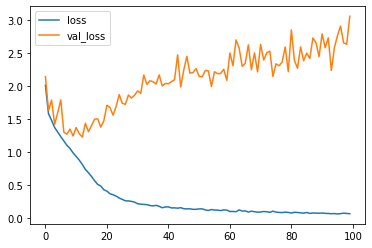

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

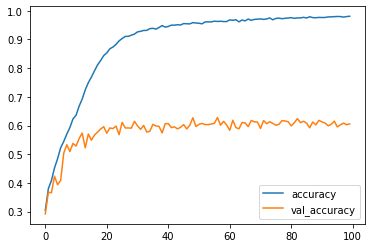

In [12]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()